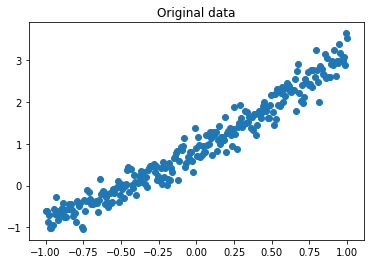

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt 



trainsamples = 200
testsamples = 60

#Here we will represent the model, a simple imput, a hidden layer of sigmoid activation
def model(X, hidden_weights1, hidden_bias1, ow):
    hidden_layer =  tf.nn.sigmoid(tf.matmul(X, hidden_weights1)+ b) 
    return tf.matmul(hidden_layer, ow)   

dsX = np.linspace(-1, 1, trainsamples + testsamples).transpose()
dsY = 0.4* pow(dsX,2) +2 * dsX + np.random.randn(*dsX.shape) * 0.22 + 0.8 

plt.figure() # Create a new figure
plt.title('Original data')
plt.scatter(dsX,dsY) #Plot a scatter draw of the  datapoints


In [2]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

hw1 = tf.Variable(tf.random_normal([1, 10], stddev=0.01)) # Create first hidden layer
ow = tf.Variable(tf.random_normal([10, 1], stddev=0.01)) # Create output connection
b = tf.Variable(tf.random_normal([10], stddev=0.01)) # Create bias

model_y = model(X, hw1, b, ow) #

cost = tf.pow(model_y-Y, 2)/(2) # Cost function

train_op = tf.train.AdamOptimizer(0.0001).minimize(cost) # construct an optimizer


In [9]:
# Launch the graph in a session
with tf.Session() as sess:
    tf.global_variables_initializer().run() #Initialize all variables
    
    for i in range(1,10):
        
        trainX, trainY =dsX[0:trainsamples], dsY[0:trainsamples]
        for x1,y1 in zip (trainX, trainY):
            sess.run(train_op, feed_dict={X: [[x1]], Y: y1})
        testX, testY = dsX[trainsamples:trainsamples + testsamples], dsY[trainsamples:trainsamples+testsamples]
        #print(testX)
       # print(testY)
        cost1=0.
        for x1,y1 in zip (testX, testY):
            cost1 += sess.run(cost, feed_dict={X: [[x1]], Y: y1}) / testsamples       
        print ("Average cost for epoch " + str (i) + ":" + str(cost1))
        dsX, dsY = shuffle (dsX, dsY) #We randomize the samples to implement a better training   
            


Average cost for epoch 1:[[1.3261766]]
Average cost for epoch 2:[[1.282025]]
Average cost for epoch 3:[[1.1793169]]
Average cost for epoch 4:[[0.9269121]]
Average cost for epoch 5:[[0.95720196]]
Average cost for epoch 6:[[0.73990834]]
Average cost for epoch 7:[[0.8690933]]
Average cost for epoch 8:[[0.96007025]]
Average cost for epoch 9:[[0.61470705]]
